# Mini Teste 5
## Equipe
* Iêsa Braga Lobato - 1515080080
* Lucas Pereira Reis - 1515080583
* Victor Souza Lopes - 1515080197

Importando bibliotecas a ser utilizadas

In [1]:
import mahotas as mh
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt
import math

Fazendo a leitura das imagens **Lena** e **Barbara** com ```mahotas```

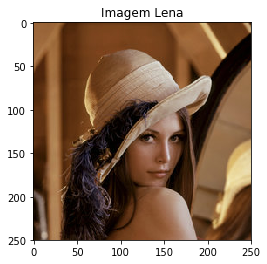

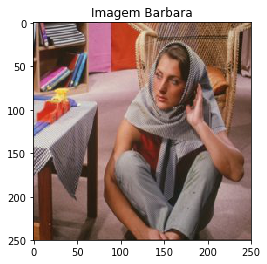

In [28]:
lena = mh.imread('imagem_original/lena.jpg')
plt.imshow(lena)
plt.title('Imagem Lena')
plt.show()

barbara = mh.imread('imagem_original/barbara.jpg')
plt.imshow(barbara)
plt.title('Imagem Barbara')
plt.show()

Função ```quantize``` para realizar a quantização

In [3]:
def quantize(raster, n_colors):
    width, height, depth = raster.shape
    reshaped_raster = np.reshape(raster, (width * height, depth))

    model = cluster.KMeans(n_clusters=n_colors)
    labels = model.fit_predict(reshaped_raster)
    palette = model.cluster_centers_

    quantized_raster = np.reshape(palette[labels], (width, height, palette.shape[1]))

    return quantized_raster

Quantizando a imagem **Lena**

In [18]:
new_lena_16 = quantize(lena,16)
new_lena_32 = quantize(lena,32)
new_lena_64 = quantize(lena,64)

Quantizando a imagem **Barbara**

In [19]:
new_barbara_16 = quantize(barbara,16)
new_barbara_32 = quantize(barbara,32)
new_barbara_64 = quantize(barbara,64)

Mostrando cada uma das imagens **Lena** quantizadas e salvando-as com ```savefig```

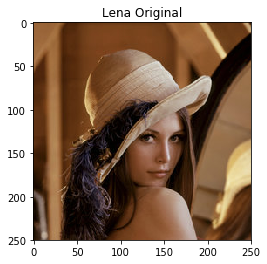

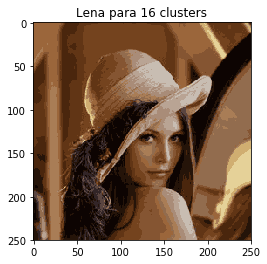

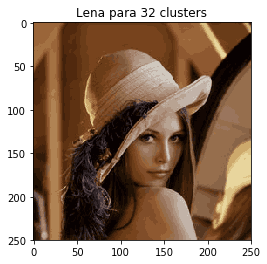

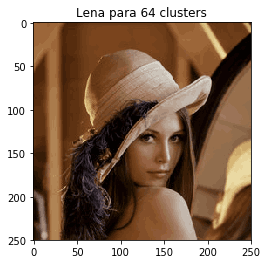

In [29]:
plt.figure(1)
plt.imshow(lena)
plt.title('Lena Original')

plt.figure(2)
plt.imshow(new_lena_16 / 255.0)
plt.title('Lena para 16 clusters')
plt.savefig('nova_imagem_lena/lena_16.png')

plt.figure(3)
plt.imshow(new_lena_32 / 255.0)
plt.title('Lena para 32 clusters')
plt.savefig('nova_imagem_lena/lena_32.png')

plt.figure(4)
plt.imshow(new_lena_64 / 255.0)
plt.title('Lena para 64 clusters')
plt.savefig('nova_imagem_lena/lena_64.png')

plt.show()

Mostrando cada uma das imagens **Barbara** quantizadas e salvando-as com ```savefig```

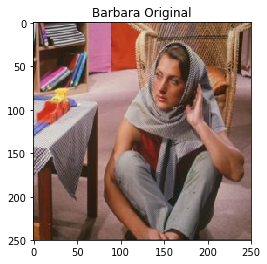

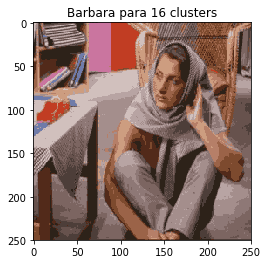

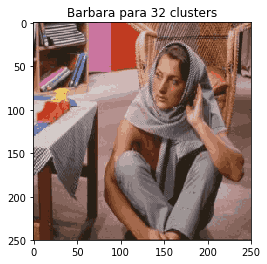

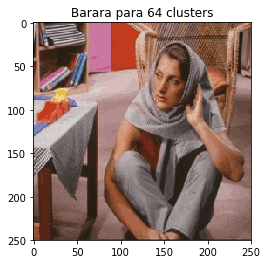

In [31]:
plt.figure(1)
plt.imshow(barbara)
plt.title('Barbara Original')

plt.figure(2)
plt.imshow(new_barbara_16 / 255.0)
plt.title('Barbara para 16 clusters')
plt.savefig('nova_imagem_barbara/barbara_16.png')

plt.figure(3)
plt.imshow(new_barbara_32 / 255.0)
plt.title('Barbara para 32 clusters')
plt.savefig('nova_imagem_barbara/barbara_32.png')

plt.figure(4)
plt.imshow(new_barbara_64 / 255.0)
plt.title('Barara para 64 clusters')
plt.savefig('nova_imagem_barbara/barbara_64.png')

plt.show()

Retirou-se 25% das cores únicas das duas imagens para realizar a compressão

In [24]:
unique_l = np.unique(lena,axis=0)
compression_rate_l = len(unique_l)*0.75

unique_b = np.unique(barbara,axis=0)
compression_rate_b = len(unique_b)*0.75

Como para essas duas imagens, a variável ```compression_rate_``` retornou float, utilizou-se ```math.ceil``` para pegar o valor em inteiro

In [25]:
compression_rate_l = math.ceil(compression_rate_l)
compression_rate_b = math.ceil(compression_rate_b)

Após realizar o tratamento na variável, quantizou-se as duas imagens

In [26]:
lena_compressed = quantize(lena,compression_rate_l)
barbara_compressed = quantize(barbara,compression_rate_b)

Exibindo as imagens com 25% de perda

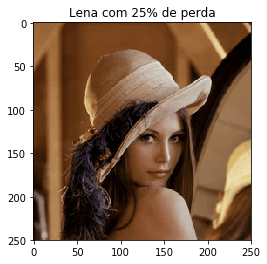

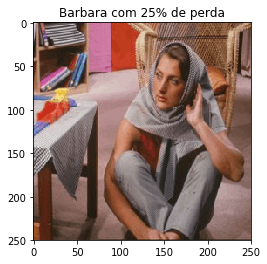

In [32]:
plt.figure(1)
plt.imshow(lena_compressed / 255.0)
plt.title('Lena com 25% de perda')
plt.savefig('nova_imagem_lena/lena_compressed.png')

plt.figure(2)
plt.imshow(barbara_compressed / 255.0)
plt.title('Barbara com 25% de perda')
plt.savefig('nova_imagem_barbara/barbara_compressed.png')
plt.show()